In [305]:
import numpy as np
import cv2
from debayer.superpixel import debayer_superpixel
from astropy.io import fits
from fwhm.star_matcher import StarMatcher
from fwhm.star_finder import StarFinder
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.coordinates import ICRS
from skymap.skymap import SkyMap
from skymap.stardb.render_view import project
import matplotlib.pyplot as plt


In [306]:
# M101 - EDT115:
center, fname = SkyCoord(14.066564 * u.hour, 54.218594 * u.degree, frame=ICRS), r"D:\Astro\20230319-M81M82_M101_M13\Light-M101-300sec\Light_ASIImg_300sec_Bin1_-9.4C_gain200_2023-03-20_023749_frame0026.fit"

# M101 - C11:
# center, fname = SkyCoord(14.066564 * u.hour, 54.218594 * u.degree, frame=ICRS), r"D:\Astro\20230528-M101-Supernova\20230601\M101\Light\Light_02780_180.0sec_300gain_0.0C.fit"
# center, fname = SkyCoord(14.066564 * u.hour, 54.218594 * u.degree, frame=ICRS), r"D:\Astro\20230528-M101-Supernova\M101\Light\Light_02650_180.0sec_300gain_-0.3C.fit"
# center, fname = SkyCoord(14.066564 * u.hour, 54.218594 * u.degree, frame=ICRS), r"D:\Astro\20230528-M101-Supernova\M101\Light\Light_02693_180.0sec_300gain_0.0C.fit"

# Bubble Nebula - EDT115:
#center, fname = SkyCoord("23h20m48.3s" "+61d12m06s", frame=ICRS), r"D:\Astro\20230818-uacnj\Bubble\Light\Light_03128_180.0sec_200gain_0.0C.fit"


## Cone search given object sky-coord

In [307]:
import itertools

def cone_search_stardata(skymap: SkyMap, center: SkyCoord, fov_deg: float):
  stars = []
  for star in skymap.coneSearch(center, fov_deg):
    if 'mag' in star and star['mag'] < 11:
      print(star)
      s_coord = SkyCoord(star['ra'] * u.degree, star['dec'] * u.degree, frame=ICRS)
      x, y = project(s_coord.ra.degree, s_coord.dec.degree, center.ra.degree, center.dec.degree, 0)
      stars.append({
        "id": star["_id"], 
        "cluster_cx": x, "cluster_cy": y, 
        "ra": s_coord.ra.degree, "dec": s_coord.dec.degree,
        "mag": star["mag"]
      })
  df_ref = pd.DataFrame(stars)
  return df_ref

with SkyMap() as sm:
  df_ref = cone_search_stardata(sm, center, fov_deg=5.0)

{'_id': 'HD121409*86UMa', 'id': 'HD 121409                          * 86 UMa', 'typ': 'Star', 'mag': 5.681125, 'ra': 208.46255842051, 'dec': 53.728676410540004}
{'_id': 'HD125632HD125632', 'id': 'HD 125632                          HD 125632', 'typ': 'Double or Multiple Star', 'mag': 6.566666666666666, 'ra': 214.73298507258, 'dec': 54.86378190693}
{'_id': 'HD125019HD125019', 'id': 'HD 125019                          HD 125019', 'typ': 'Star', 'mag': 6.590749999999999, 'ra': 213.82081606608, 'dec': 52.5359235043}
{'_id': 'HD125469HD125469', 'id': 'HD 125469                          HD 125469', 'typ': 'Star', 'mag': 6.88125, 'ra': 214.4495911524, 'dec': 55.42536085858}
{'_id': 'HD122007HD122007', 'id': 'HD 122007                          HD 122007', 'typ': 'Spectroscopic Binary', 'mag': 7.035, 'ra': 209.42845864746, 'dec': 53.91006131858}
{'_id': 'HD120915HD120915', 'id': 'HD 120915                          HD 120915', 'typ': 'High Proper Motion Star', 'mag': 7.048749999999999, 'ra': 207.

In [308]:
df_ref

,id,cluster_cx,cluster_cy,ra,dec,mag
0,HD121409*86UMa,-0.026176,-0.008081,208.462558,53.728676,5.681125
1,HD125632HD125632,0.037486,0.012252,214.732985,54.863782,6.566667
2,HD125019HD125019,0.029951,-0.028765,213.820816,52.535924,6.590750
3,HD125469HD125469,0.034161,0.021895,214.449591,55.425361,6.881250
4,HD122007HD122007,-0.016139,-0.005205,209.428459,53.910061,7.035000
...,...,...,...,...,...,...
167,TYC3471-311-1,0.004436,-0.039771,211.410692,51.938542,10.947500
168,TYC3851-1233-1,-0.038237,-0.003548,207.272428,53.957480,10.972500
169,TYC3855-2-1,-0.002774,0.036187,210.712057,56.292096,10.980000
170,TYC3471-893-1,-0.001637,-0.042692,210.846884,51.771676,10.996250


## Plot of stars in the neighborhood

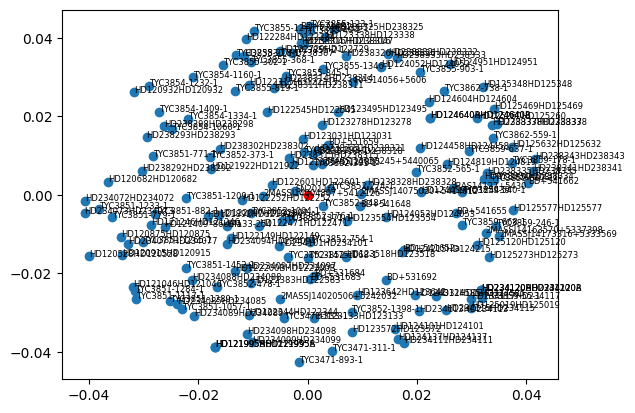

In [309]:
plt.scatter(df_ref.cluster_cx, df_ref.cluster_cy)
for i in range(len(df_ref)):
  r = df_ref.iloc[i]
  plt.annotate(r.id, (r.cluster_cx, r.cluster_cy), fontsize=6)
x, y = project(center.ra.degree, center.dec.degree, center.ra.degree, center.dec.degree, 0)
plt.scatter([x], [y], c='r')

plt.show()

In [310]:
df_ref.head()

,id,cluster_cx,cluster_cy,ra,dec,mag
0,HD121409*86UMa,-0.026176,-0.008081,208.462558,53.728676,5.681125
1,HD125632HD125632,0.037486,0.012252,214.732985,54.863782,6.566667
2,HD125019HD125019,0.029951,-0.028765,213.820816,52.535924,6.590750
3,HD125469HD125469,0.034161,0.021895,214.449591,55.425361,6.881250
4,HD122007HD122007,-0.016139,-0.005205,209.428459,53.910061,7.035000


## Read image and run star matching

In [311]:

with fits.open(fname) as f:
    ph = f[0]
    img = ph.data
    img = np.expand_dims(img, axis=2)
    # img16 = debayer_superpixel(img)
    img16 = cv2.cvtColor(img, cv2.COLOR_BAYER_BG2BGR) # RGGB pattern

assert(img16.dtype == np.uint16)
assert(len(img16.shape) == 3)
assert(img16.shape[2] == 3)
img16 = cv2.cvtColor(img16, cv2.COLOR_BGR2GRAY)
img8 = ((img16 / np.iinfo(np.uint16).max) *np.iinfo(np.uint8).max).astype(np.uint8)
numStars = 20
#img8 = cv2.equalizeHist(img8)
star_img, df_tgt = StarFinder().find_stars(img8=np.squeeze(img8), img16=np.squeeze(img16), topk=numStars)

# votes, vVotingPairs = StarMatcher().matchStars(df_ref, df_tgt, return_merged=False)


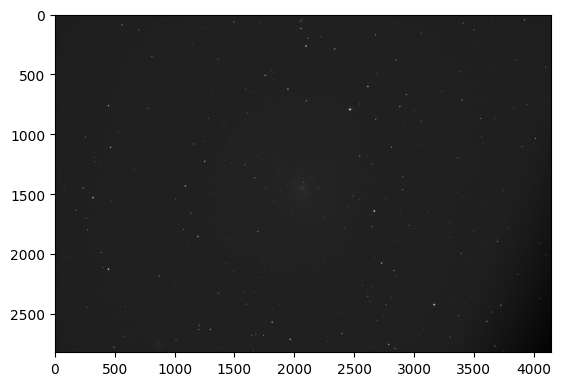

In [312]:
plt.imshow(img8, cmap='gray')

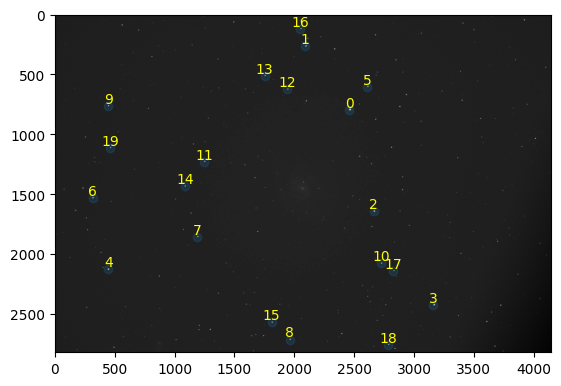

In [313]:
plt.imshow(img8, cmap='gray')
plt.scatter(df_tgt.cluster_cx, df_tgt.cluster_cy, alpha=0.2)
for idx, tgt in df_tgt.iterrows():
  plt.text(tgt.cluster_cx, tgt.cluster_cy, idx, va='bottom', ha='center', c='yellow')

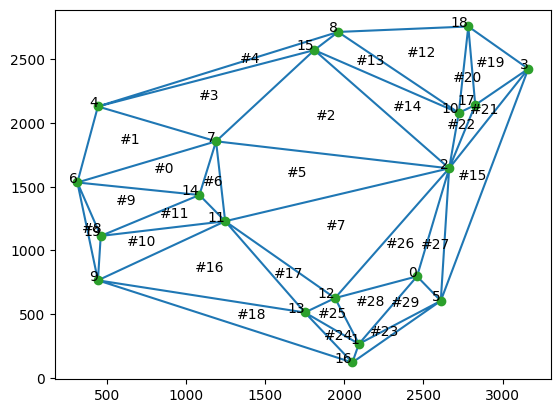

In [314]:
from scipy.spatial import Delaunay
import numpy as np
points = np.array(df_tgt.apply(lambda x: [x.cluster_cx, x.cluster_cy], axis=1).to_list())
tri = Delaunay(points)

plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
for j, p in enumerate(points):
    plt.text(p[0]-0.03, p[1]+0.03, j, ha='right') # label the points
for j, s in enumerate(tri.simplices):
    p = points[s].mean(axis=0)
    plt.text(p[0], p[1], f'#{j}', ha='center') # label triangles

plt.show()

In [315]:
m = StarMatcher()

tri_tgt = pd.DataFrame(m._getVertexSortedTriangles(df_tgt, itertools.combinations(df_tgt.index, 3), fov_deg=None))

# tri_ref =  m._getVertexSortedDelaunayTriangles(df_ref, fov_deg=1.0)


# tri_ref = []
# for mag_lim in range(int(df_ref.mag.min())+1, int(df_ref.mag.max())+2, 1):
#   df = df_ref[df_ref.mag <= mag_lim]
#   print(mag_lim, len(df))
#   if len(df) < 3: continue
#   tri_ref.append(m._getVertexSortedDelaunayTriangles(df, fov_deg=1.0))
# tri_ref = pd.concat(tri_ref)


D = None
vTriangles = []
initial_points = []
pt_idx = []
for mag in range(int(df_ref.mag.min()), int(df_ref.mag.max())+1, 1):
  df = df_ref[(df_ref.mag >= mag) & (df_ref.mag < mag+1)]

  points = []
  for idx, r in df.iterrows():
    points.append([r.cluster_cx, r.cluster_cy])
    pt_idx.append(idx)

  if D is None:
    if len(initial_points) < 4:
      initial_points.extend(points)
    
    if len(initial_points) >= 4:
      D = Delaunay(initial_points, incremental=True)
  else:
    D.add_points(points)

    print(mag, len(df))
    if len(df) < 3: continue
    pt_indices = [[pt_idx[x], pt_idx[y], pt_idx[z]] for x,y,z in D.simplices]
    vTriangles.extend(m._getVertexSortedTriangles(df_ref, pt_indices, fov_deg=1.0))

vTriangles = sorted(vTriangles, key=lambda x: x["fX"])
tri_ref = pd.DataFrame(vTriangles)

print(f"Ref triangles: {len(tri_ref)}, Tgt triangles: {len(tri_tgt)}")

7 10
8 18
9 43
10 97
Ref triangles: 335, Tgt triangles: 1140


In [316]:
tri_ref

,A,B,C,fX,fY
0,37,27,32,0.000013,0.999991
1,37,27,80,0.000019,1.000000
2,114,63,12,0.000370,0.999888
3,63,144,12,0.000541,0.999862
4,46,27,32,0.000653,0.999977
...,...,...,...,...,...
330,43,143,78,0.927671,0.982519
331,11,149,50,0.928197,0.942042
332,94,153,14,0.941681,0.954220
333,124,21,20,0.956681,0.980461


In [317]:
df_tgt

,area,cluster_cx,cluster_cy,iwc_cx,iwc_cy,gaussian_cx,gaussian_cy,box,tile_4,tile_32,fwhm_x,fwhm_y
0,306,2459.339869,796.254902,18.000977,18.000977,19.194800,19.327271,"[2440, 777, 2479, 816]",206779,3327,28.773877,28.994726
1,296,2092.300676,265.655405,18.000977,17.000977,18.651985,19.410598,"[2073, 247, 2112, 284]",68899,1105,35.787602,37.563271
2,282,2661.925532,1643.964539,17.000977,18.000977,18.906894,18.593050,"[2643, 1625, 2680, 1662]",426461,6713,31.319495,31.380991
3,277,3161.400722,2425.620939,19.000977,16.000977,17.573283,19.303057,"[3142, 2408, 3181, 2443]",628606,9979,27.762146,30.357820
4,271,445.383764,2129.645756,17.000977,17.000977,18.411115,18.170398,"[427, 2111, 464, 2148]",551263,8724,32.317971,32.105248
5,267,2609.067416,603.745318,16.000977,17.000977,18.557638,16.699823,"[2592, 585, 2627, 622]",157088,2552,39.967423,37.849796
6,254,315.850394,1532.964567,17.000977,16.000977,16.812521,18.645589,"[297, 1516, 334, 1549]",396867,6250,29.920715,33.464895
7,247,1190.890688,1856.271255,16.000977,16.000977,17.228431,17.603802,"[1173, 1839, 1208, 1874]",481002,7577,37.470790,37.716272
8,242,1961.095041,2714.834711,17.000977,15.000977,16.503163,17.864117,"[1943, 2698, 1980, 2731]",703934,11111,33.618761,37.233394
9,241,445.390041,764.792531,17.000977,15.000977,16.451420,17.470674,"[428, 748, 463, 781]",197987,3134,34.359371,36.037797


In [318]:
tri_tgt

,A,B,C,fX,fY
0,17,10,9,0.044021,0.955984
1,17,10,6,0.046869,0.955346
2,17,10,19,0.046978,0.953430
3,17,10,4,0.050848,0.956588
4,16,1,18,0.055322,0.944679
...,...,...,...,...,...
1135,15,5,9,0.937675,0.957767
1136,2,1,14,0.938087,0.970224
1137,2,14,16,0.968287,0.993361
1138,2,13,7,0.977239,0.979660


## Cluster triangles

In [319]:
#TRIANGLETOLERANCE = 1e-3

In [320]:
# ab = tri_tgt.groupby(by=['A', 'B']).agg(list)
# idx = ab.C.apply(len).argmax()
# c = ab.iloc[idx].C
# a,b = ab.index[idx]
# print(a,b,c)
# print(ab.iloc[idx])

# matches = {}
# for ci in c:
#     tgt = tri_tgt[(tri_tgt.A==a)&(tri_tgt.B==b)&(tri_tgt.C==ci)]
#     if len(tgt) > 0:
#         fX, fY = tgt.fX.iloc[0], tgt.fY.iloc[0]
#         s1 = tri_ref[
#             (tri_ref.fX >= fX - TRIANGLETOLERANCE/2) &
#             (tri_ref.fX <= fX + TRIANGLETOLERANCE/2) &
#             (tri_ref.fY >= fY - TRIANGLETOLERANCE/2) &
#             (tri_ref.fY <= fY + TRIANGLETOLERANCE/2)
#         ]
#         s1 = s1.apply(lambda r: set([int(r.A), int(r.B), int(r.C)]), axis=1)
#         if len(s1) > 0:
#             matches[(a,b,ci)] = s1.to_list()

In [321]:
# from collections import defaultdict

# candidates = set()
# match_keys = list(matches.keys())
# print(match_keys)

# for i1 in range(len(match_keys)):
#     (a1, b1, c1) = match_keys[i1]
#     for x in matches[(a1, b1, c1)]:
#         for i2 in range(i1+1, len(match_keys)):
#             (a2, b2, c2) = match_keys[i2]
#             for y in matches[(a2, b2, c2)]:
#                 ix = x.intersection(y)
#                 if len(ix) == 2:
#                     ix = sorted(list(ix))
#                     candidates.add(tuple(ix))

# candidate_counts = defaultdict(int)
# for i1 in range(len(match_keys)):
#     (a1, b1, c1) = match_keys[i1]
#     for x in matches[(a1, b1, c1)]:
#         for y in candidates:
#             ix = x.intersection(y)
#             if len(ix) == 2:
#                 print(i1, x, y)
#                 candidate_counts[y] += 1

In [322]:
# candidate_counts

In [323]:
# plt.scatter(df_ref.cluster_cx, df_ref.cluster_cy)
# for i in range(len(df_ref)):
#   r = df_ref.iloc[i]
#   plt.annotate(r.id, (r.cluster_cx, r.cluster_cy), fontsize=6)


# t = df_ref[df_ref.index.isin([155, 60, 115])]
# plt.scatter(t.cluster_cx, t.cluster_cy, c='r')

# plt.show()

## Triangle matching

In [324]:

from itertools import product

vertex_sorted = True
down_votes = True
absolute_similar = True
vote_with_conf = True


for TRIANGLETOLERANCE in [
        1e-5, 5e-5, 1e-4, 2e-4,
        3e-4, 5e-4, 7e-4, 1e-3,
        2e-3, 5e-3, 7e-3, 1e-2]:
    votes = np.zeros((len(df_ref)+1, len(df_tgt)+1), dtype=np.float32)

    for tgt in tri_tgt.itertuples():
        if absolute_similar:
            similar_triangles = tri_ref[
                (tri_ref.fX >= tgt.fX - TRIANGLETOLERANCE/2) &
                (tri_ref.fX <= tgt.fX + TRIANGLETOLERANCE/2) &
                (tri_ref.fY >= tgt.fY - TRIANGLETOLERANCE/2) &
                (tri_ref.fY <= tgt.fY + TRIANGLETOLERANCE/2)
            ]
        else:
            ref_matches = tri_ref[
                (tri_ref.fX >= tgt.fX - TRIANGLETOLERANCE/2) &
                (tri_ref.fX <= tgt.fX + TRIANGLETOLERANCE/2)]
            similar_triangles = ref_matches[(ref_matches.fX-tgt.fX)**2 + (ref_matches.fY-tgt.fY)**2 < TRIANGLETOLERANCE**2]

        for ref in similar_triangles.itertuples():
            if vote_with_conf:
                err = ((ref.fX-tgt.fX)**2 + (ref.fY-tgt.fY)**2)
                upvote = 1/(np.exp(err*100))
                downvote = upvote / 4
            else:
                upvote = 1
                downvote = 1/4

            if vertex_sorted:
                # expect matched ABC vertices
                votes[ref.A, tgt.A] += upvote
                votes[ref.B, tgt.B] += upvote
                votes[ref.C, tgt.C] += upvote

                if down_votes:
                    votes[ref.A, tgt.B] -= downvote
                    votes[ref.A, tgt.C] -= downvote

                    votes[ref.B, tgt.A] -= downvote
                    votes[ref.B, tgt.C] -= downvote
                    
                    votes[ref.C, tgt.A] -= downvote
                    votes[ref.C, tgt.B] -= downvote
            else:
                # expect unordered star indices s1, s2, s3
                for a,b in product([ref.s1, ref.s2, ref.s3], [tgt.s1, tgt.s2, tgt.s3]):
                    votes[int(a), b] += upvote
    if np.sum(votes) > 10:
        break
    
print(f"TRIANGLETOLERANCE: {TRIANGLETOLERANCE}")
print(f"Total triangle comparisons: {len(tri_ref) * len(tri_tgt)}")
print(f"Total votes: {np.sum(votes)}, hit-ratio: {np.sum(votes) / (len(tri_ref) * len(tri_tgt))}")

TRIANGLETOLERANCE: 0.002
Total triangle comparisons: 381900
Total votes: 17.99906349182129, hit-ratio: 4.713030503226313e-05


In [325]:
with open('votes.csv', 'wt') as f:  
  arr = votes.flatten()
  for i in range(arr.shape[0]):
    f.write(f"{arr[i]}\n")


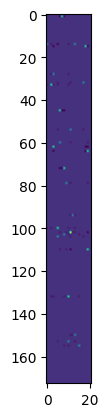

In [326]:
plt.imshow(votes)

(array([5.700e+01, 3.552e+03, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00,
        0.000e+00, 1.000e+01, 0.000e+00, 1.000e+00]),
 array([-0.49998403, -0.14999907,  0.19998589,  0.54997087,  0.89995581,
         1.24994075,  1.59992576,  1.94991064,  2.29989552,  2.64988065,
         2.99986553]),
 <BarContainer object of 10 artists>)

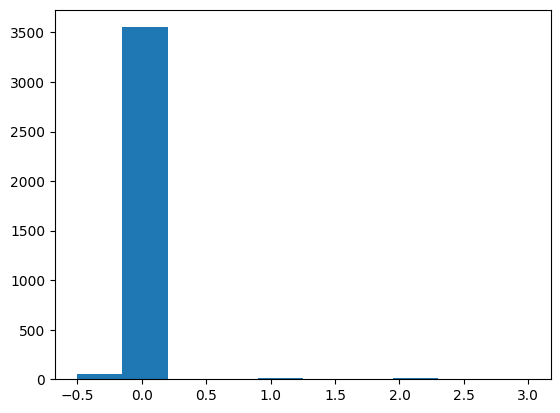

In [327]:
plt.hist(votes.flatten())

In [328]:
# Produce sorted list of star pairs with highest votes
vVotingPairs = np.column_stack(np.unravel_index(np.argsort(votes, axis=None), shape=votes.shape))[::-1]

In [329]:
cutoff = votes.max() / 4
# print(f"Vote cutoff threshold: {cutoff}")
topVotePairs = list(filter(lambda r: votes[r[0],r[1]] > cutoff, vVotingPairs))

matches = []
for vp in topVotePairs:
    s1, s2 = vp
    # if s1 == 0 or s2 == 0: # WHY ?
    #     continue
    if np.argmax(votes[:, s2]) == s1 and np.argmax(votes[s1, :]) == s2:
        matches.append((s1, s2))

df_tgt['starno'] = None
df_tgt['votes'] = None
for m1, m2 in matches:
    df_tgt.loc[m2, 'starno'] = m1
    df_tgt.loc[m2, 'votes'] = votes[m1, m2]

In [330]:
d = []
# n = []
for i in range(len(df_tgt)):
    m = votes[:,i]
    ave = (m.sum() - m.max())/(len(m)-1)
    d.append((m.max()-ave)/ave)
    # n.append(len(np.argwhere(m > 2 * ave)))
print(d)
# print(n)
# plt.plot(m)
# plt.plot(np.arange(0, len(m)), np.full(len(m), ave))


[-345.0, nan, -344.9999794953618, -689.0488891654976, nan, -688.9855650272349, -689.0230494390725, -345.00002050593264, -689.064394651171, -345.00000000000006, -688.9945459391852, -516.9979085069548, -344.99997949494497, -9461105.747540982, nan, -345.0, nan, -344.9999794949169, -344.99999999999994, -7862567.168937331]


C:\Users\anand\AppData\Local\Temp\ipykernel_12844\408611718.py:6: RuntimeWarning: invalid value encountered in scalar divide
  d.append((m.max()-ave)/ave)


## Matched stars

In [331]:
# display(df_tgt[~df_tgt.starno.isnull()])
df_tgt

,area,cluster_cx,cluster_cy,iwc_cx,iwc_cy,gaussian_cx,gaussian_cy,box,tile_4,tile_32,fwhm_x,fwhm_y,starno,votes
0,306,2459.339869,796.254902,18.000977,18.000977,19.194800,19.327271,"[2440, 777, 2479, 816]",206779,3327,28.773877,28.994726,None,None
1,296,2092.300676,265.655405,18.000977,17.000977,18.651985,19.410598,"[2073, 247, 2112, 284]",68899,1105,35.787602,37.563271,None,None
2,282,2661.925532,1643.964539,17.000977,18.000977,18.906894,18.593050,"[2643, 1625, 2680, 1662]",426461,6713,31.319495,31.380991,33,1.999937
3,277,3161.400722,2425.620939,19.000977,16.000977,17.573283,19.303057,"[3142, 2408, 3181, 2443]",628606,9979,27.762146,30.357820,62,1.99983
4,271,445.383764,2129.645756,17.000977,17.000977,18.411115,18.170398,"[427, 2111, 464, 2148]",551263,8724,32.317971,32.105248,None,None
5,267,2609.067416,603.745318,16.000977,17.000977,18.557638,16.699823,"[2592, 585, 2627, 622]",157088,2552,39.967423,37.849796,100,1.999936
6,254,315.850394,1532.964567,17.000977,16.000977,16.812521,18.645589,"[297, 1516, 334, 1549]",396867,6250,29.920715,33.464895,45,1.999811
7,247,1190.890688,1856.271255,16.000977,16.000977,17.228431,17.603802,"[1173, 1839, 1208, 1874]",481002,7577,37.470790,37.716272,1,1.999811
8,242,1961.095041,2714.834711,17.000977,15.000977,16.503163,17.864117,"[1943, 2698, 1980, 2731]",703934,11111,33.618761,37.233394,72,1.999811
9,241,445.390041,764.792531,17.000977,15.000977,16.451420,17.470674,"[428, 748, 463, 781]",197987,3134,34.359371,36.037797,79,0.999978


##  Solved or not

In [332]:
if df_tgt.starno.isnull().sum() >= 3:
  print("Solved")
else:
  print("Failed")

Solved


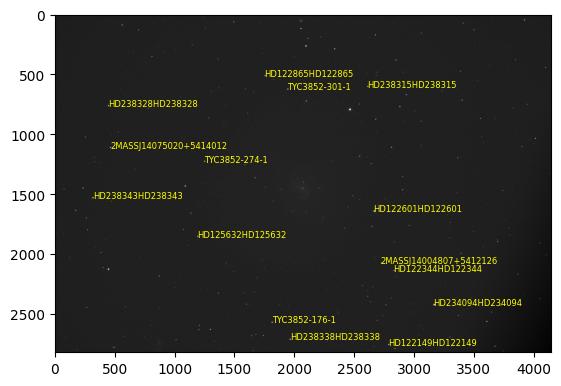

In [333]:
plt.imshow(img8, cmap='gray')
for idx, star in df_tgt[~df_tgt.starno.isnull()].iterrows():
    # print(star.starno, (star.cluster_cx, star.cluster_cy))
    plt.annotate(df_ref.loc[star.starno].id, (star.cluster_cx, star.cluster_cy), fontsize=6, color='yellow')

## Calculate transformation matrix
From known star mapping to image, compute affine transformation to map database projection to image

In [334]:
img_stars = df_tgt[~df_tgt.starno.isnull()][['starno','cluster_cx', 'cluster_cy', 'votes']]
img_ref_stars = df_ref[['id','cluster_cx', 'cluster_cy', 'ra', 'dec']].join(img_stars.set_index('starno'), rsuffix='r', how='right')
display(img_ref_stars)

,id,cluster_cx,cluster_cy,ra,dec,cluster_cxr,cluster_cyr,votes
starno,,,,,,,,
33,HD122601HD122601,-0.006576,0.002585,210.351711,54.364956,2661.925532,1643.964539,1.999937
62,HD234094HD234094,-0.014669,-0.012460,209.585505,53.496290,3161.400722,2425.620939,1.99983
100,HD238315HD238315,-0.003434,0.009523,210.657476,54.763749,2609.067416,603.745318,1.999936
45,HD238343HD238343,0.041705,0.009219,215.134826,54.676827,315.850394,1532.964567,1.999811
1,HD125632HD125632,0.037486,0.012252,214.732985,54.863782,1190.890688,1856.271255,1.999811
72,HD238338HD238338,0.034673,0.018036,214.481803,55.203007,1961.095041,2714.834711,1.999811
79,HD238328HD238328,0.010846,0.002653,212.065167,54.365932,445.390041,764.792531,0.999978
132,2MASSJ14004807+5412126,-0.008148,-0.000217,210.200308,54.203532,2722.650862,2079.258621,1.999985
102,TYC3852-274-1,0.004157,0.001636,211.406708,54.311622,1248.407895,1228.820175,2.999866


In [335]:
matched_star_triple = img_ref_stars.sort_values('votes', ascending=False)[:3]
display(matched_star_triple)

,id,cluster_cx,cluster_cy,ra,dec,cluster_cxr,cluster_cyr,votes
starno,,,,,,,,
102,TYC3852-274-1,0.004157,0.001636,211.406708,54.311622,1248.407895,1228.820175,2.999866
132,2MASSJ14004807+5412126,-0.008148,-0.000217,210.200308,54.203532,2722.650862,2079.258621,1.999985
33,HD122601HD122601,-0.006576,0.002585,210.351711,54.364956,2661.925532,1643.964539,1.999937


In [336]:
src = np.array([(row.cluster_cx, row.cluster_cy) for _, row in matched_star_triple.iterrows()], dtype=np.float32)
dst = np.array([(row.cluster_cxr, row.cluster_cyr) for _, row in matched_star_triple.iterrows()], dtype=np.float32)

In [337]:
import cv2
tx = cv2.getAffineTransform(src, dst)
print(tx)

[[-127300.68726714   49725.45287933    1696.2219298 ]
 [ -49940.20947091 -127370.64805945    1644.74082248]]


## Apply transform with dot-product

In [338]:
df_ref[['img_cx', 'img_cy']] = df_ref.apply(lambda r: pd.Series(np.dot(tx, [r.cluster_cx, r.cluster_cy, 1])).astype(np.int32), axis=1)

## Applyig transform with cv2.transform

In [339]:
# pts = np.array([[(r.cluster_cx, r.cluster_cy) for _,r in df_ref.iterrows()]], dtype=np.float32)
# print(pts[0,0,:])
# tx_pts = cv2.transform(pts, tx)
# print(tx_pts[0,0,:])
# print(pts.shape, tx_pts.shape)
# display(np.hstack([pts[0], tx_pts[0]])[0:5])

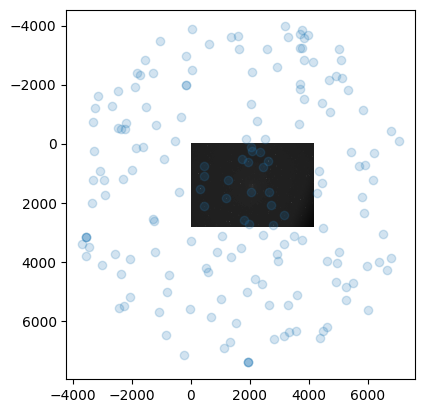

In [340]:
# pts = tx * pts
plt.imshow(img8, cmap='gray')
# plt.scatter(tx_pts[0, :, 0], tx_pts[0, :, 1], alpha=0.2)
plt.scatter(df_ref.img_cx, df_ref.img_cy, alpha=0.2)

# Reassign stars


In [341]:

def dist(x1,y1, x2,y2):
  return np.sqrt((y2-y1)**2+(x2-x1)**2)
def reassign(t):
  x = df_ref.apply(lambda r: pd.Series([dist(t.cluster_cx, t.cluster_cy, r.img_cx, r.img_cy)]), axis=1)[0]
  m = x.min()
  if m < 25:
    return x.argmin()
  else:
    return None
df_tgt['starno'] = df_tgt.apply(reassign, axis=1)


In [342]:
df_tgt

,area,cluster_cx,cluster_cy,iwc_cx,iwc_cy,gaussian_cx,gaussian_cy,box,tile_4,tile_32,fwhm_x,fwhm_y,starno,votes
0,306,2459.339869,796.254902,18.000977,18.000977,19.194800,19.327271,"[2440, 777, 2479, 816]",206779,3327,28.773877,28.994726,14.0,None
1,296,2092.300676,265.655405,18.000977,17.000977,18.651985,19.410598,"[2073, 247, 2112, 284]",68899,1105,35.787602,37.563271,57.0,None
2,282,2661.925532,1643.964539,17.000977,18.000977,18.906894,18.593050,"[2643, 1625, 2680, 1662]",426461,6713,31.319495,31.380991,33.0,1.999937
3,277,3161.400722,2425.620939,19.000977,16.000977,17.573283,19.303057,"[3142, 2408, 3181, 2443]",628606,9979,27.762146,30.357820,28.0,1.99983
4,271,445.383764,2129.645756,17.000977,17.000977,18.411115,18.170398,"[427, 2111, 464, 2148]",551263,8724,32.317971,32.105248,36.0,None
5,267,2609.067416,603.745318,16.000977,17.000977,18.557638,16.699823,"[2592, 585, 2627, 622]",157088,2552,39.967423,37.849796,100.0,1.999936
6,254,315.850394,1532.964567,17.000977,16.000977,16.812521,18.645589,"[297, 1516, 334, 1549]",396867,6250,29.920715,33.464895,60.0,1.999811
7,247,1190.890688,1856.271255,16.000977,16.000977,17.228431,17.603802,"[1173, 1839, 1208, 1874]",481002,7577,37.470790,37.716272,116.0,1.999811
8,242,1961.095041,2714.834711,17.000977,15.000977,16.503163,17.864117,"[1943, 2698, 1980, 2731]",703934,11111,33.618761,37.233394,103.0,1.999811
9,241,445.390041,764.792531,17.000977,15.000977,16.451420,17.470674,"[428, 748, 463, 781]",197987,3134,34.359371,36.037797,79.0,0.999978


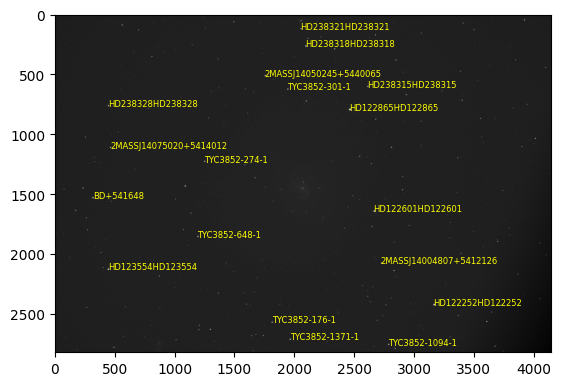

In [343]:
plt.imshow(img8, cmap='gray')
for idx, star in df_tgt[~df_tgt.starno.isnull()].iterrows():
    # print(star.starno, (star.cluster_cx, star.cluster_cy))
    plt.annotate(df_ref.loc[star.starno].id, (star.cluster_cx, star.cluster_cy), fontsize=6, color='yellow')

## Map pixel coordinated to RA,DEC
Use linear regression to fit a function to map pixel coordinates to RA,DEC.
Useful to find RA, DEC of image center.

In [344]:
from sklearn.linear_model import LinearRegression
X = df_ref[['img_cx', 'img_cy']]
y = df_ref[['ra', 'dec']]
reg = LinearRegression().fit(X, y)
pred_center = reg.predict([[img8.shape[1]//2, img8.shape[0]//2]])[0]
pred_center = SkyCoord(pred_center[0] * u.degree, pred_center[1] * u.degree, frame=ICRS)
print(f"Image Center RA,DEC: {pred_center}")
print(f"Separation from target: {center.separation(pred_center).arcminute}")

Image Center RA,DEC: <SkyCoord (ICRS): (ra, dec) in deg
    (210.81263171, 54.34910103)>
Separation from target: 10.182368204476056


c:\Users\anand\anaconda3\envs\astro\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [345]:
df_tgt['name'] = None
for idx, star in df_tgt[~df_tgt.starno.isnull()].iterrows():
  df_tgt.loc[idx, 'name'] = df_ref.loc[star.starno].id

In [346]:
df_tgt

,area,cluster_cx,cluster_cy,iwc_cx,iwc_cy,gaussian_cx,gaussian_cy,box,tile_4,tile_32,fwhm_x,fwhm_y,starno,votes,name
0,306,2459.339869,796.254902,18.000977,18.000977,19.194800,19.327271,"[2440, 777, 2479, 816]",206779,3327,28.773877,28.994726,14.0,None,HD122865HD122865
1,296,2092.300676,265.655405,18.000977,17.000977,18.651985,19.410598,"[2073, 247, 2112, 284]",68899,1105,35.787602,37.563271,57.0,None,HD238318HD238318
2,282,2661.925532,1643.964539,17.000977,18.000977,18.906894,18.593050,"[2643, 1625, 2680, 1662]",426461,6713,31.319495,31.380991,33.0,1.999937,HD122601HD122601
3,277,3161.400722,2425.620939,19.000977,16.000977,17.573283,19.303057,"[3142, 2408, 3181, 2443]",628606,9979,27.762146,30.357820,28.0,1.99983,HD122252HD122252
4,271,445.383764,2129.645756,17.000977,17.000977,18.411115,18.170398,"[427, 2111, 464, 2148]",551263,8724,32.317971,32.105248,36.0,None,HD123554HD123554
5,267,2609.067416,603.745318,16.000977,17.000977,18.557638,16.699823,"[2592, 585, 2627, 622]",157088,2552,39.967423,37.849796,100.0,1.999936,HD238315HD238315
6,254,315.850394,1532.964567,17.000977,16.000977,16.812521,18.645589,"[297, 1516, 334, 1549]",396867,6250,29.920715,33.464895,60.0,1.999811,BD+541648
7,247,1190.890688,1856.271255,16.000977,16.000977,17.228431,17.603802,"[1173, 1839, 1208, 1874]",481002,7577,37.470790,37.716272,116.0,1.999811,TYC3852-648-1
8,242,1961.095041,2714.834711,17.000977,15.000977,16.503163,17.864117,"[1943, 2698, 1980, 2731]",703934,11111,33.618761,37.233394,103.0,1.999811,TYC3852-1371-1
9,241,445.390041,764.792531,17.000977,15.000977,16.451420,17.470674,"[428, 748, 463, 781]",197987,3134,34.359371,36.037797,79.0,0.999978,HD238328HD238328
